### Crear la sesión de pyspark y cargar el dataframe

In [1]:
from pyspark.sql import SparkSession

# Creamos la sesión 
spark = SparkSession.builder \
    .appName("EDA_pyspak") \
    .config("spark.driver.memory", "6g") \
    .config("spark.executor.memory", "6g") \
    .config("spark.executor.instances", "2") \
    .config("spark.executor.cores", "2") \
    .getOrCreate()  

# Caragamos los datos
originalData = spark.read.option("header","true").csv("original_data.csv")

# Creamos una tabla temporal para hacer consultas tipo sql
originalData.createOrReplaceTempView('originalData')

# Función para visualizar más amigablemente los datos
from IPython.display import display
import pandas as pd 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

def show(dataframe, limit = 5):
    """
    Función que muestra el dataframe (de pyspark) en el formato de Pandas con todas las columnas
    limitandose limit columnas. Se elimina el dataframe que se utiliza.

    Args:
        dataframe (pyspark.sql.dataframe.DataFrame) : DataFrame a mostrar
        limit (int) : Límite de registros a imprimit, por default 5
    
    """
    pandasDataFrame__ = dataframe.limit(limit).toPandas()
    display(pandasDataFrame__)
    
    del pandasDataFrame__


# Función para eliminar completamente dataframes de pyspark
def borrar(dataframe):
    """
    Función para eliminar tanto el caché como un dataframe que ya no se utilizará 
    Args:
        datagrame (DataFrame): Dataframe a eliminar
    """
    dataframe.unpersist()
    del dataframe


# Vemos el dataframe 
show(originalData)

# Vemos el esquéma de los datos
originalData.printSchema()

24/08/05 23:59:23 WARN Utils: Your hostname, proyectosrym resolves to a loopback address: 127.0.1.1; using 148.204.64.184 instead (on interface eno1)
24/08/05 23:59:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/05 23:59:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/05 23:59:26 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


ID_code target    var_0    var_1    var_2   var_3    var_4    var_5  \
0  train_0      0   8.9255  -6.7863  11.9081   5.093  11.4607  -9.2834   
1  train_1      0  11.5006  -4.1473  13.8588   5.389  12.3622   7.0433   
2  train_2      0   8.6093  -2.7457  12.0805  7.8928  10.5825  -9.0837   
3  train_3      0  11.0604  -2.1518   8.9522  7.1957  12.5846  -1.8361   
4  train_4      0   9.8369  -1.4834  12.8746  6.6375  12.2772   2.4486   

    var_6    var_7    var_8   var_9   var_10    var_11   var_12   var_13  \
0  5.1187  18.6266    -4.92   5.747   2.9252    3.1821  14.0137   0.5745   
1  5.6208  16.5338   3.1468  8.0851  -0.4032    8.0585  14.0239   8.4135   
2  6.9427  14.6155  -4.9193  5.9525  -0.3249  -11.2648  14.1929   7.3124   
3  5.8428   14.925  -5.8609   8.245   2.3061    2.8102  13.8463  11.9704   
4  5.9405  19.2514   6.2654  7.6784  -9.4458  -12.1419  13.8481   7.8895   

   var_14   var_15   var_16    var_17   var_18   var_19   var_20   var_21  \
0  8.7989  14.5691   5.7487   -7.2393    4.284  30.7133   10.535  16.2191   
1  5.4345  13.7003  13.8275  -15.5849      7.8  28.5708   3.4287   2.7407   
2  7.5244  14.6472   7.6782   -1.7395   4.7011  20.4775  17.7559  18.1377   
3  6.4569  14.8372   10.743   -0.4299  15.9426  13.7257   20.301  12.5579   
4  7.7894  15.0553   8.4871    -3.068   6.5263  11.3152  21.4246  18.9608   

    var_22  var_23   var_24   var_25    var_26   var_27  var_28  var_29  \
0   2.5791  2.4716  14.3831  13.4325   -5.1488  -0.4073  4.9306  5.9965   
1   8.5524  3.3716   6.9779   13.891  -11.7684  -2.5586  5.0464  0.5481   
2   1.2145  3.5137   5.6777  13.2177    -7.994  -2.9029  5.8463  6.1439   
3   6.8202  2.7229  12.1354  13.7367    0.8135  -0.9059   5.907  2.8407   
4  10.1102  2.7142   14.208  13.5433    3.1736  -3.3423  5.9015  7.9352   

     var_30   var_31   var_32   var_33   var_34   var_35  var_36  var_37  \
0   -0.3085  12.9041  -3.8766  16.8911   11.192  10.5785  0.6764  7.8871   
1   -9.2987   7.8755   1.2859   19.371  11.3702   0.7399  2.7995  5.8434   
2  -11.1025  12.4858  -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346   
3  -15.2398  10.4407  -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   
4   -3.1582   9.4668  -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184   

    var_38  var_39    var_40   var_41   var_42   var_43   var_44    var_45  \
0   4.6667  3.8743   -5.2387   7.3746  11.5767  12.0446  11.6418    -7.017   
1   10.816  3.6783  -11.1147    1.873   9.8775  11.7842   1.2444  -47.3797   
2  10.8917  0.9003  -13.5174   2.2439  11.5283  12.0406   4.1006   -7.9078   
3   9.1738  0.6665   -3.8294   -1.037   11.777  11.2834   8.0485   -24.684   
4  19.3038   1.445   -5.5963  14.0685  11.9171  11.5111   6.9087  -65.4863   

    var_46    var_47   var_48   var_49   var_50   var_51   var_52  var_53  \
0   5.9226  -14.2136  16.0283   5.3253  12.9194   29.046   -0.694  5.1736   
1   7.3718    0.1948  34.4014  25.7037  11.8343  13.2256  -4.1083  6.6885   
2  11.1405   -5.7864  20.7477   6.8874  12.9143  19.5856   0.7268  6.4059   
3  12.7404  -35.1659   0.7613   8.3838  12.6832   9.5503   1.7895  5.2091   
4  13.8657    0.0444  -0.1346  14.4268  13.3273  10.4857  -1.4367  5.7555   

    var_54   var_55   var_56  var_57  var_58   var_59   var_60    var_61  \
0  -0.7474  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828     4.959   
1  -8.0946  18.5995  19.3219  7.0118   1.921   8.8682   8.0109   -7.2417   
2   9.3124   6.2846  15.6372    5.82     1.1   9.1854  12.5963  -10.3734   
3   8.0913  12.3972  14.4698   6.585  3.3164   9.4638   15.782  -25.0222   
4  -8.5414  14.1482   16.984  6.1812  1.9548   9.2048   8.6591  -27.7439   

    var_62   var_63  var_64   var_65  var_66   var_67  var_68   var_69  \
0   2.0771  -0.2154  8.6748   9.5319  5.8056  22.4321  5.0109   -4.701   
1   1.7944  -1.3147  8.1042   1.5365  5.4007   7.9344   5.022   2.2302   
2   0.8748   5.8042  3.7163  -1.1016  7.3667   9.8565  5.0228  -5.7828   
3   3.4418  -4.3923  8.6464   6.3072  5.6221 

root
 |-- ID_code: string (nullable = true)
 |-- target: string (nullable = true)
 |-- var_0: string (nullable = true)
 |-- var_1: string (nullable = true)
 |-- var_2: string (nullable = true)
 |-- var_3: string (nullable = true)
 |-- var_4: string (nullable = true)
 |-- var_5: string (nullable = true)
 |-- var_6: string (nullable = true)
 |-- var_7: string (nullable = true)
 |-- var_8: string (nullable = true)
 |-- var_9: string (nullable = true)
 |-- var_10: string (nullable = true)
 |-- var_11: string (nullable = true)
 |-- var_12: string (nullable = true)
 |-- var_13: string (nullable = true)
 |-- var_14: string (nullable = true)
 |-- var_15: string (nullable = true)
 |-- var_16: string (nullable = true)
 |-- var_17: string (nullable = true)
 |-- var_18: string (nullable = true)
 |-- var_19: string (nullable = true)
 |-- var_20: string (nullable = true)
 |-- var_21: string (nullable = true)
 |-- var_22: string (nullable = true)
 |-- var_23: string (nullable = true)
 |-- var_24: str

Corrección del esquema de los datos

In [2]:
from pyspark.sql.types import FloatType
# ELiminamos la primer columna
originalData=originalData.drop('ID_code')

# Corregimos el tipo de dato a flotante para todos los datos
for column in originalData.columns:
    originalData = originalData.withColumn(column, originalData[column].cast(FloatType()))

# Vemos el esquema de los datos
originalData.printSchema()

root
 |-- target: float (nullable = true)
 |-- var_0: float (nullable = true)
 |-- var_1: float (nullable = true)
 |-- var_2: float (nullable = true)
 |-- var_3: float (nullable = true)
 |-- var_4: float (nullable = true)
 |-- var_5: float (nullable = true)
 |-- var_6: float (nullable = true)
 |-- var_7: float (nullable = true)
 |-- var_8: float (nullable = true)
 |-- var_9: float (nullable = true)
 |-- var_10: float (nullable = true)
 |-- var_11: float (nullable = true)
 |-- var_12: float (nullable = true)
 |-- var_13: float (nullable = true)
 |-- var_14: float (nullable = true)
 |-- var_15: float (nullable = true)
 |-- var_16: float (nullable = true)
 |-- var_17: float (nullable = true)
 |-- var_18: float (nullable = true)
 |-- var_19: float (nullable = true)
 |-- var_20: float (nullable = true)
 |-- var_21: float (nullable = true)
 |-- var_22: float (nullable = true)
 |-- var_23: float (nullable = true)
 |-- var_24: float (nullable = true)
 |-- var_25: float (nullable = true)
 |-- v

### Conteo del número de datos por clase

In [3]:
# Vemos el total clases de cada persona
spark.sql("""
    SELECT 
        SUM(CASE WHEN target = 0 THEN 1 ELSE 0 END) AS totalTarget0,
        SUM(CASE WHEN target = 1 THEN 1 ELSE 0 END) AS totalTarget1
    FROM originalData
""").show()

+------------+------------+
|totalTarget0|totalTarget1|
+------------+------------+
|      179902|       20098|
+------------+------------+



In [4]:
print(f'Un {round(179902/(179902+20098)*100, 3)}% de los datos son de la etiqueta 0')

Un 89.951% de los datos son de la etiqueta 0


Es decir, tenemos un dataset con clases desbalanceadas. Eso motiva a considerar algoritmos que sean robustos para dicha tarea (como XGBoost o autoencoders).

### Análisis de valores nulos

In [5]:
# Inicial la consulta SQL
queryNulls = 'SELECT '

# Añadir le conteo de nulos por cada columna
for column in originalData.columns:
    queryNulls += f'SUM(CASE WHEN {column} IS NULL THEN 1 ELSE 0 END) AS {column}_Nulos, '
queryNulls = queryNulls[:-2] + ' FROM originalData'

# Ejecturar la consulta y mostrar los resultados
show(spark.sql(queryNulls))

target_Nulos  var_0_Nulos  var_1_Nulos  var_2_Nulos  var_3_Nulos  \
0             0            0            0            0            0   

   var_4_Nulos  var_5_Nulos  var_6_Nulos  var_7_Nulos  var_8_Nulos  \
0            0            0            0            0            0   

   var_9_Nulos  var_10_Nulos  var_11_Nulos  var_12_Nulos  var_13_Nulos  \
0            0             0             0             0             0   

   var_14_Nulos  var_15_Nulos  var_16_Nulos  var_17_Nulos  var_18_Nulos  \
0             0             0             0             0             0   

   var_19_Nulos  var_20_Nulos  var_21_Nulos  var_22_Nulos  var_23_Nulos  \
0             0             0             0             0             0   

   var_24_Nulos  var_25_Nulos  var_26_Nulos  var_27_Nulos  var_28_Nulos  \
0             0             0             0             0             0   

   var_29_Nulos  var_30_Nulos  var_31_Nulos  var_32_Nulos  var_33_Nulos  \
0             0             0             0             0             0   

   var_34_Nulos  var_35_Nulos  var_36_Nulos  var_37_Nulos  var_38_Nulos  \
0             0             0             0             0             0   

   var_39_Nulos  var_40_Nulos  var_41_Nulos  var_42_Nulos  var_43_Nulos  \
0             0             0             0             0             0   

   var_44_Nulos  var_45_Nulos  var_46_Nulos  var_47_Nulos  var_48_Nulos  \
0             0             0             0             0             0   

   var_49_Nulos  var_50_Nulos  var_51_Nulos  var_52_Nulos  var_53_Nulos  \
0             0             0             0             0             0   

   var_54_Nulos  var_55_Nulos  var_56_Nulos  var_57_Nulos  var_58_Nulos  \
0             0             0             0             0             0   

   var_59_Nulos  var_60_Nulos  var_61_Nulos  var_62_Nulos  var_63_Nulos  \
0             0             0             0             0             0   

   var_64_Nulos  var_65_Nulos  var_66_Nulos  var_67_Nulos  var_68_Nulos  \
0             0             0             0             0             0   

   var_69_Nulos  var_70_Nulos  var_71_Nulos  var_72_Nulos  var_73_Nulos  \
0             0             0             0             0             0   

   var_74_Nulos  var_75_Nulos  var_76_Nulos  var_77_Nulos  var_78_Nulos  \
0             0             0             0             0             0   

   var_79_Nulos  var_80_Nulos  var_81_Nulos  var_82_Nulos  var_83_Nulos  \
0             0             0             0             0             0   

   var_84_Nulos  var_85_Nulos  var_86_Nulos  var_87_Nulos  var_88_Nulos  \
0             0             0             0             0             0   

   var_89_Nulos  var_90_Nulos  var_91_Nulos  var_92_Nulos  var_93_Nulos  \
0             0             0             0             0             0   

   var_94_Nulos  var_95_Nulos  var_96_Nulos  var_97_Nulos  var_98_Nulos  \
0             0             0             0             0             0   

   var_99_Nulos  var_100_Nulos  var_101_Nulos  var_102_Nulos  var_103_Nulos  \
0             0              0              0              0              0   

   var_104_Nulos  var_105_Nulos  var_106_Nulos  var_107_Nulos  var_108_Nulos  \
0              0              0              0              0              0   

   var_109_Nulos  var_110_Nulos  var_111_Nulos  var_112_Nulos  var_113_Nulos  \
0              0              0              0              0              0   

   var_114_Nulos  var_115_Nulos  var_116_Nulos  var_117_Nulos  var_118_Nulos  \
0              0              0              0              0              0   

   var_119_Nulos  var_120_Nulos  var_121_Nulos  var_122_Nulos  var_123_Nulos  \
0              0              0              0              0              0   

   var_124_Nulos  var_125_Nulos  var_126_Nulos  var_127_Nulos  var_128_Nulos  \
0              0              0              0              0              0   

   var_129_Nulos  var_130_Nulos  var_13

### Amálisis de correlaciones

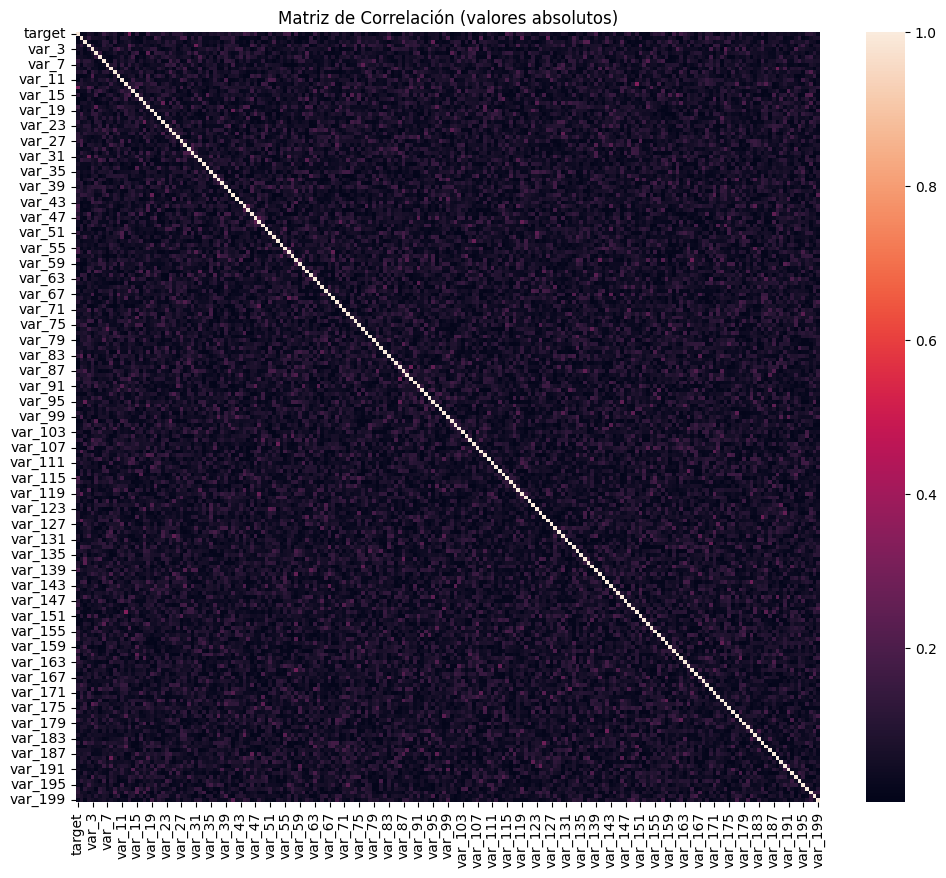

In [6]:
# Visualizamos con seabron la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

# Tomamos una muestra del dataframe
corr_sample = originalData.sample(0.001).toPandas().corr().abs()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap
sns.heatmap(corr_sample, annot=False, cmap='rocket')

# Mostrar el heatmap
plt.title('Matriz de Correlación (valores absolutos)')
plt.show()

### Análisis y limpieza de valores atípicos

In [7]:
from pyspark.sql.functions import col

# Filtramos los datos de la etiqueta 0 y creamos una vista temporal
data0 = originalData.filter(originalData['target'] == 0)
data0.createOrReplaceTempView('data0')

# Filtramos los datos de la etiqueta 1 y creamos una vista temporal
data1 = originalData.filter(originalData['target'] == 1)
data1.createOrReplaceTempView('data1')


# Eliminamos el dataframe original
borrar(originalData)

def borrarOutliers(etiqueta):
    """
    Elimina los outliers de un DataFrame basado en la etiqueta proporcionada.

    Args:
        etiqueta (int): Etiqueta para seleccionar el DataFrame (0 o 1). 
                        - 0 selecciona los datos con etiqueta 0.
                        - 1 selecciona los datos con etiqueta 1.

    Returns:
        DataFrame: DataFrame con los outliers eliminados.
    """
    # Selecciona el DataFrame y la vista temporal basados en la etiqueta
    if etiqueta == 1:
        tabla = 'data1'  # Nombre de la vista temporal para datos con etiqueta 1
        data = data1      # DataFrame para datos con etiqueta 1
    elif etiqueta == 0:
        tabla = 'data0'  # Nombre de la vista temporal para datos con etiqueta 0
        data = data0      # DataFrame para datos con etiqueta 0
    else:
        raise ValueError("Etiqueta debe ser 0 o 1")  # Manejo de errores si la etiqueta no es válida

    print (f'Para data{etiqueta} se borraron los valotes atípicos de la columna:')
    # Itera sobre todas las columnas del DataFrame (excepto la columna 'target')
    for columna in originalData.columns[1:]:
        
        # Consulta SQL para calcular los percentiles 25 y 75 de la columna actual
        queryCuantiles = f"""
            SELECT 
                PERCENTILE({columna}, 0.25) AS Q1,  -- Percentil 25 (Q1)
                PERCENTILE({columna}, 0.75) AS Q3   -- Percentil 75 (Q3)
            FROM {tabla}
        """

        # Ejecuta la consulta y obtiene los resultados
        cuantiles = spark.sql(queryCuantiles).collect()[0]

        # Extrae los valores de Q1 y Q3 de los resultados
        Q1 = cuantiles['Q1']
        Q3 = cuantiles['Q3']
        
        # Calcula el rango intercuartílico (IQR)
        IQR = Q3 - Q1
        
        # Define los límites inferior y superior para los outliers
        lowerBound = Q1 - 1.5 * IQR
        upperBound = Q3 + 1.5 * IQR

        # Filtra los datos para eliminar los outliers
        data = data.filter((col(columna) > lowerBound) & (col(columna) < upperBound))

        print(f'{columna}', end = ",  ")

    return data


data0 = borrarOutliers(0)
data1 = borrarOutliers(1)

Para data0 se borraron los valotes atípicos de la columna:
var_0,  var_1,  var_2,  var_3,  var_4,  var_5,  var_6,  var_7,  var_8,  var_9,  var_10,  var_11,  var_12,  var_13,  var_14,  var_15,  var_16,  var_17,  var_18,  var_19,  var_20,  var_21,  var_22,  var_23,  var_24,  var_25,  var_26,  var_27,  var_28,  var_29,  var_30,  var_31,  var_32,  var_33,  var_34,  var_35,  var_36,  var_37,  var_38,  var_39,  var_40,  var_41,  var_42,  var_43,  var_44,  var_45,  var_46,  var_47,  var_48,  var_49,  var_50,  var_51,  var_52,  var_53,  var_54,  var_55,  var_56,  var_57,  var_58,  var_59,  var_60,  var_61,  var_62,  var_63,  var_64,  var_65,  var_66,  var_67,  var_68,  var_69,  var_70,  var_71,  var_72,  var_73,  var_74,  var_75,  var_76,  var_77,  var_78,  var_79,  var_80,  var_81,  var_82,  var_83,  var_84,  var_85,  var_86,  var_87,  var_88,  var_89,  var_90,  var_91,  var_92,  var_93,  var_94,  var_95,  var_96,  var_97,  var_98,  var_99,  var_100,  var_101,  var_102,  var_103,  var_104,  v

### Visualización y prueba de normalidad para los datos

Etiqueta 0


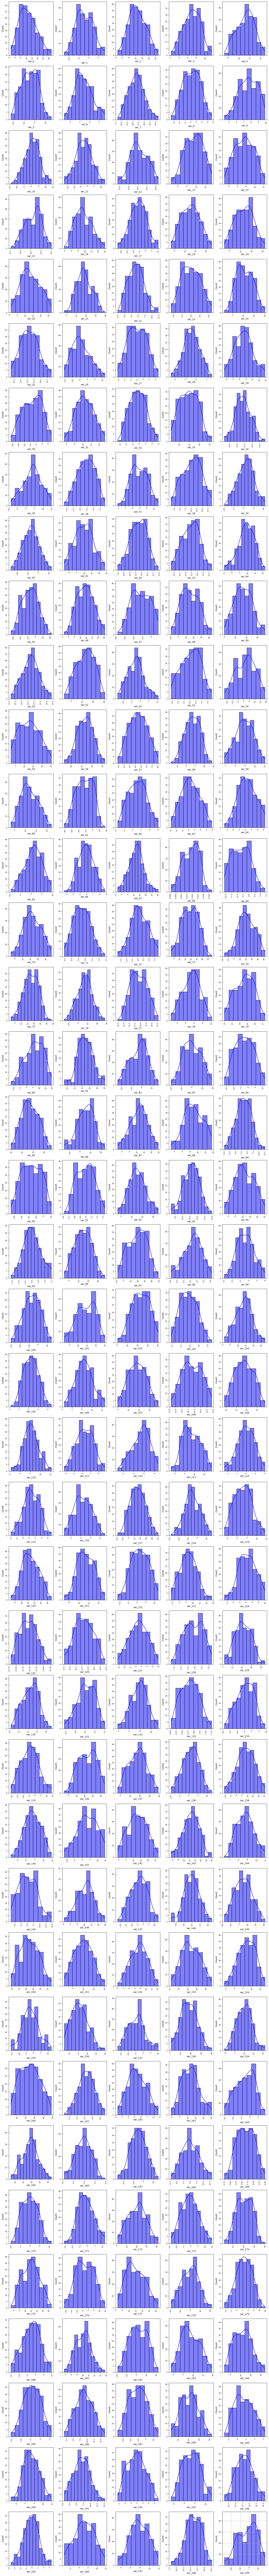

****************************************************************************************************
Etiqueta 1


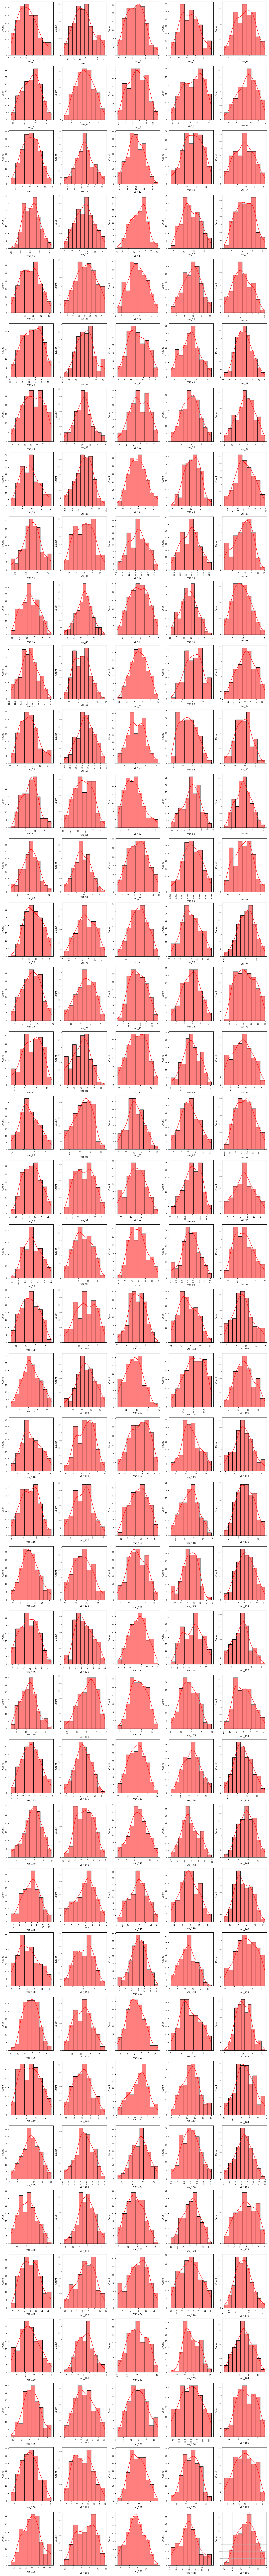

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotHistogramas(dataframe, etiqueta):
    # Color del gráfico según la etiqueta
    color = 'blue' if etiqueta == 0 else 'red'

    # Tomamos una muestra de tamaño 200 para cada conjunto de datos
    dataSample = dataframe.sample(200 / dataframe.count()).toPandas()

    # Número de columnas (excluyendo 'target')
    NumCols = len(dataframe.columns) - 1
    numRows = (NumCols // 5) + (1 if NumCols % 5 else 0)

    # Configuramos el gráfico
    fig, axes = plt.subplots(nrows=numRows, ncols=5, figsize=(20, 5*numRows))

    # Aplana el arreglo de ejes en caso de ser una matriz
    if NumCols <= 5:
        axes = [axes]
    
    for i, column in enumerate(dataframe.columns[1:]):
        if column != 'target':
            row, col = divmod(i, 5)
            sns.histplot(dataSample[column], kde=True, color=color, ax=axes[row, col])
            axes[row, col].tick_params(axis='x', labelrotation=90, labelsize=8)
            axes[row, col].tick_params(axis='y', labelsize=8)

    # Desactivar los ejes restantes si hay menos columnas que subplots
    for j in range(i + 1, numRows * 5):
        axes[j // 5, j % 5].axis('off')

    # Ajustar el diseño
    plt.grid(True)
    plt.show()
    del dataSample
    
# Ejecutar la función para los datos de la etiqueta 0
print('Etiqueta 0')
plotHistogramas(data0, 0)
print("*"*100)

# Ejecutar la función para los datos de la etiqueta 0
print('Etiqueta 1')
plotHistogramas(data1, 1)

In [69]:
from pyspark.sql.functions import abs, col, skewness
from functools import reduce


def queryAsimetria(etiqueta):
    # Selecciona el DataFrame y la tabla según la etiqueta
    data = data0 if etiqueta == 0 else data1
    tabla = 'data0' if etiqueta == 0 else 'data1'
    
    # Construye la consulta SQL para calcular la asimetría
    columns = data.columns[1:]  # Excluye la primera columna si es 'target'
    
    # Construye la lista de expresiones para la consulta
    expressions = [f'skewness({column}) AS Asimetria_{column}' for column in columns]
    
    # Une las expresiones con comas y agrega la cláusula FROM
    queryAsimetria = f'SELECT {", ".join(expressions)} FROM {tabla}'
    
    # Ejecuta la consulta SQL
    skewness_df = spark.sql(queryAsimetria)
    
    # Filtra las columnas con asimetría mayor al valor absoluto de 1
    # Primero, obtenemos el nombre de las columnas con asimetría alta
    column_names = [f'Asimetria_{column}' for column in columns]
    filter_conditions = [abs(col(column_name)) > 1 for column_name in column_names]
    
    # Une las condiciones con OR
    filter_condition = reduce(lambda a, b: a | b, filter_conditions)
    
    # Aplica el filtro
    filtered_skewness_df = skewness_df.filter(filter_condition)
    
    # Muestra el resultado
    show(filtered_skewness_df)

    # Borramos el dataframe de pyspark
    borrar(filtered_skewness_df)
    borrar(skewness_df)

# Análisis de asimetría para la etiqueta 0
print('Etiqueta 0')
queryAsimetria(0)

print('Etiqueta 1')
queryAsimetria(1)

Etiqueta 0


24/08/06 18:57:59 WARN DAGScheduler: Broadcasting large task binary with size 1556.9 KiB


Empty DataFrame
Columns: [Asimetria_var_0, Asimetria_var_1, Asimetria_var_2, Asimetria_var_3, Asimetria_var_4, Asimetria_var_5, Asimetria_var_6, Asimetria_var_7, Asimetria_var_8, Asimetria_var_9, Asimetria_var_10, Asimetria_var_11, Asimetria_var_12, Asimetria_var_13, Asimetria_var_14, Asimetria_var_15, Asimetria_var_16, Asimetria_var_17, Asimetria_var_18, Asimetria_var_19, Asimetria_var_20, Asimetria_var_21, Asimetria_var_22, Asimetria_var_23, Asimetria_var_24, Asimetria_var_25, Asimetria_var_26, Asimetria_var_27, Asimetria_var_28, Asimetria_var_29, Asimetria_var_30, Asimetria_var_31, Asimetria_var_32, Asimetria_var_33, Asimetria_var_34, Asimetria_var_35, Asimetria_var_36, Asimetria_var_37, Asimetria_var_38, Asimetria_var_39, Asimetria_var_40, Asimetria_var_41, Asimetria_var_42, Asimetria_var_43, Asimetria_var_44, Asimetria_var_45, Asimetria_var_46, Asimetria_var_47, Asimetria_var_48, Asimetria_var_49, Asimetria_var_50, Asimetria_var_51, Asimetria_var_52, Asimetria_var_53, Asimetria_var_54, Asimetria_var_55, Asimetria_var_56, Asimetria_var_57, Asimetria_var_58, Asimetria_var_59, Asimetria_var_60, Asimetria_var_61, Asimetria_var_62, Asimetria_var_63, Asimetria_var_64, Asimetria_var_65, Asimetria_var_66, Asimetria_var_67, Asimetria_var_68, Asimetria_var_69, Asimetria_var_70, Asimetria_var_71, Asimetria_var_72, Asimetria_var_73, Asimetria_var_74, Asimetria_var_75, Asimetria_var_76, Asimetria_var_77, Asimetria_var_78, Asimetria_var_79, Asimetria_var_80, Asimetria_var_81, Asimetria_var_82, Asimetria_var_83, Asimetria_var_84, Asimetria_var_85, Asimetria_var_86, Asimetria_var_87, Asimetria_var_88, Asimetria_var_89, Asimetria_var_90, Asimetria_var_91, Asimetria_var_92, Asimetria_var_93, Asimetria_var_94, Asimetria_var_95, Asimetria_var_96, Asimetria_var_97, Asimetria_var_98, Asimetria_var_99, ...]
Index: []

Etiqueta 1


24/08/06 18:58:04 WARN DAGScheduler: Broadcasting large task binary with size 1556.9 KiB


Empty DataFrame
Columns: [Asimetria_var_0, Asimetria_var_1, Asimetria_var_2, Asimetria_var_3, Asimetria_var_4, Asimetria_var_5, Asimetria_var_6, Asimetria_var_7, Asimetria_var_8, Asimetria_var_9, Asimetria_var_10, Asimetria_var_11, Asimetria_var_12, Asimetria_var_13, Asimetria_var_14, Asimetria_var_15, Asimetria_var_16, Asimetria_var_17, Asimetria_var_18, Asimetria_var_19, Asimetria_var_20, Asimetria_var_21, Asimetria_var_22, Asimetria_var_23, Asimetria_var_24, Asimetria_var_25, Asimetria_var_26, Asimetria_var_27, Asimetria_var_28, Asimetria_var_29, Asimetria_var_30, Asimetria_var_31, Asimetria_var_32, Asimetria_var_33, Asimetria_var_34, Asimetria_var_35, Asimetria_var_36, Asimetria_var_37, Asimetria_var_38, Asimetria_var_39, Asimetria_var_40, Asimetria_var_41, Asimetria_var_42, Asimetria_var_43, Asimetria_var_44, Asimetria_var_45, Asimetria_var_46, Asimetria_var_47, Asimetria_var_48, Asimetria_var_49, Asimetria_var_50, Asimetria_var_51, Asimetria_var_52, Asimetria_var_53, Asimetria_var_54, Asimetria_var_55, Asimetria_var_56, Asimetria_var_57, Asimetria_var_58, Asimetria_var_59, Asimetria_var_60, Asimetria_var_61, Asimetria_var_62, Asimetria_var_63, Asimetria_var_64, Asimetria_var_65, Asimetria_var_66, Asimetria_var_67, Asimetria_var_68, Asimetria_var_69, Asimetria_var_70, Asimetria_var_71, Asimetria_var_72, Asimetria_var_73, Asimetria_var_74, Asimetria_var_75, Asimetria_var_76, Asimetria_var_77, Asimetria_var_78, Asimetria_var_79, Asimetria_var_80, Asimetria_var_81, Asimetria_var_82, Asimetria_var_83, Asimetria_var_84, Asimetria_var_85, Asimetria_var_86, Asimetria_var_87, Asimetria_var_88, Asimetria_var_89, Asimetria_var_90, Asimetria_var_91, Asimetria_var_92, Asimetria_var_93, Asimetria_var_94, Asimetria_var_95, Asimetria_var_96, Asimetria_var_97, Asimetria_var_98, Asimetria_var_99, ...]
Index: []